
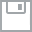
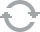
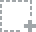
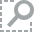
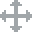
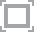
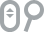
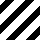
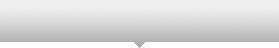
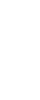
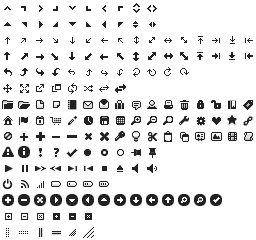
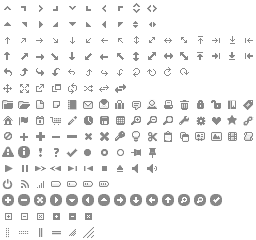
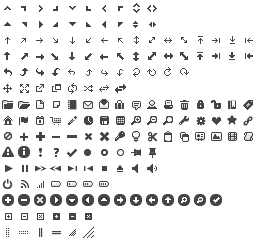
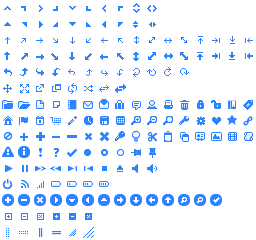
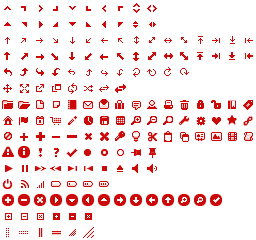
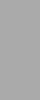
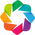
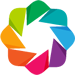

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from bokeh.plotting import figure,show,output_notebook
output_notebook()

from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

%matplotlib inline

# 1. -- Projectile Height --
* a) Find a good model to fit this data.
* b) Find the time at which the projectile hit the ground.

##### mk:

* A. Line plot appears to be the best model to use for this simple dataset.
* B. The time when the projectile hits the ground is t = 3.28 seconds

In [30]:
time = [0,0.5,1,1.5,2,2.5]
height = [0,20.5,31.36,36.25,30.41,28.23]
proj_data = zip(time,height)
#proj_data

In [31]:
h_df = pd.DataFrame(proj_data,columns=['time','height'])
h_df.head()

,time,height
0,0.0,0.00
1,0.5,20.50
2,1.0,31.36
3,1.5,36.25
4,2.0,30.41


In [32]:
#h_df.plot(kind='scatter',x='time',y='height')

In [33]:
x = h_df.time.values
y = h_df.height.values

X = np.c_[x,(-x**2)+x]

In [34]:
nl = sm.OLS(y,X).fit()
#nl.params

In [35]:
xn = np.linspace(0,4,100)
Xnew = np.c_[xn,(-xn**2)+xn]
ynew_preds = nl.predict(Xnew)
#ynew_preds 

In [36]:
p = figure(title='Projectile Height')
p.circle(x, y, color='blue')
p.line(xn,ynew_preds,line_color='red',line_width=3)
show(p)

In [37]:
xi = np.linspace(2,4,1000)
Xi = np.c_[xi,(-xi**2)+xi]

for i in Xi:
    if nl.predict(i) < 0:
        print i
        break
    else:
        continue

# t = 3.28 seconds

[ 3.28128128 -7.48552557]


# 2. -- Healthcare Costs --
* a) Find a model that fits the data well.
* b) Find the time the average healthcare cost will reach $2800 per person.

##### mk:

* A. Line plot appears to be the best model to use for this simple dataset.
* B. Where the line intercpets at $2800 is after mid 2005 (2005.624).

In [38]:
year = [1976,1980,1987,1993,1998]
cost = [618,860,1324,1865,2256]
hc_data = zip(year,cost)
hc_df = pd.DataFrame(hc_data,columns=['year','cost'])
hc_df.head()
#hc_df.plot(x='year',y='cost')

,year,cost
0,1976,618
1,1980,860
2,1987,1324
3,1993,1865
4,1998,2256


In [39]:
x = hc_df['year'].values
X = sm.add_constant(x, prepend=True)
y = hc_df['cost'].values

costmodel = sm.OLS(y, X).fit()

In [40]:
intercept, slope = costmodel.params

x1 = range(int(min(x)),2011)
y1 = [intercept + slope*val for val in x1]

p = figure(title='Average Healthcare Costs')
p.circle(x, y, color='blue')
p.line(x1,y1,line_color='red',line_width=3)
show(p)

In [41]:
print slope
print intercept

75.1915544676
-148005.980416


In [42]:
(2800-intercept)/slope

# Will reach $2800 in mid 2005 (2005.624)

2005.6239225804345

# 3. -- Regularization --
* a) Find a good model to fit this data.
* b) Play around with different forms of regularization to see the effect and choose one.

##### mk: Linear model below shows that a smaller alpha value (0.1) will be more accurate than a higher value for alpha (1).

In [43]:
x_val = [-1,0,1,2,3,5,7,9]
y_val = [-1,3,2.5,5,4,2,5,4]
xy = zip(x_val,y_val)
xy_df = pd.DataFrame(xy,columns=['x_val','y_val'])
#xy_df
#xy_df.plot('x_val','y_val',kind='scatter')

In [51]:
from sklearn.linear_model import Ridge, Lasso

x = xy_df['x_val'].values
y = xy_df['y_val'].values

ridge = Ridge(alpha = 0.1)
ridge.fit(np.vander(x, 6), y)

ridge_ = Ridge(alpha = 3)
ridge_.fit(np.vander(x, 6), y)

xx = np.linspace(-1.25,10,1000)

p = figure()
p.circle(x, y, size=8,color='blue')
p.line(xx, ridge.predict(np.vander(xx,6)), color='red')
p.line(xx, ridge_.predict(np.vander(xx,6)), color='green')
show(p)

# 4. -- Wine Quality Data --
Import the dataset to a Pandas dataframe and explore the data using a scatter matrix plot.
* a. Do you notice any correlation?
* b. What can you say about the quality score?
* c. How many features are there? Are they normalized?

##### mk:
* A. Correlations
    * ph and fixed acidity
    * fixed acidity and citric acid
    * density and alcohol
        * Google research shows that a ph level of 7 or more is considered acidic, so the negative correlation with fixed acidity is expected. Also, fixed acidity and citric acid are positively correlated, as expected.

* B. Quality Score: Upon inspection of the data, majority of the quality scores were between five and seven. It appears that high levels of volatile acitidy deterioriate wine score. It appears the other relationships are normal distribution with no significant highs/lows.
* C. There are eleven features in this dataset. However, since units are not explained or provided on any of the webpages associated with the dataset, I am unable to determind with confidence the data is normalized, althogh it appears to be.

In [45]:
red_wine = pd.read_csv('winequality-red.csv',sep=';')
#red_wine.describe().T
red_wine.columns

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')

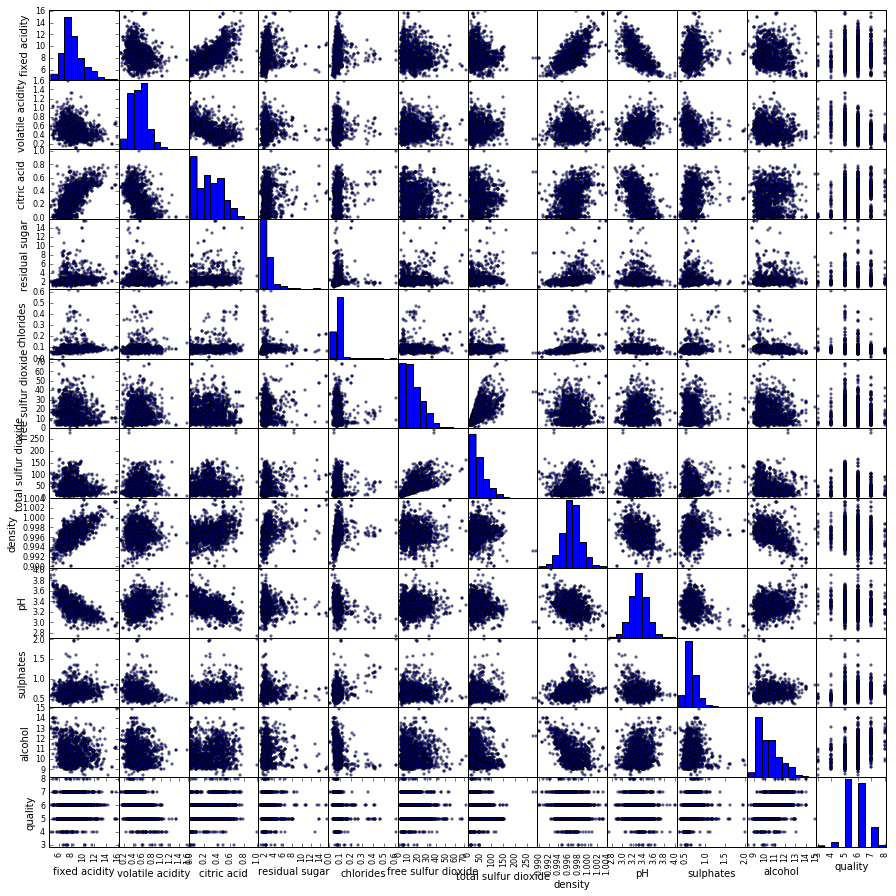

In [46]:
from pandas.tools.plotting import scatter_matrix
scat = scatter_matrix(red_wine, figsize = (15,15))

# 5. -- Generalized Linear Model --
Use a generalized linear model to predict the quality score of the wine.
* a. What precautions will you take to account for the imbalance between different the amount of data in each class?
* b. How will you treat the fact that the score is discrete in value?

###### mk: Regularization does not have a significant effect on the CV score. 

In [47]:
# from sklearn.linear_model import LogisticRegression

features = red_wine.ix[:,:11].values
target = red_wine.quality.values

log_ovr_1 = LogisticRegression(C=1, multi_class='ovr').fit(features, target)
log_multi_newton_1 = LogisticRegression(C=1, multi_class='multinomial',solver='newton-cg').fit(features, target)
log_multi_lbfgs_1 = LogisticRegression(C=1, multi_class='multinomial',solver='lbfgs').fit(features, target)


log_ovr_01 = LogisticRegression(C=0.1, multi_class='ovr').fit(features, target)
log_multi_newton_01 = LogisticRegression(C=0.1, multi_class='multinomial',solver='newton-cg').fit(features, target)
log_multi_lbfgs_01 = LogisticRegression(C=0.1, multi_class='multinomial',solver='lbfgs').fit(features, target)

log_ovr_3 = LogisticRegression(C=3, multi_class='ovr').fit(features, target)
log_multi_newton_3 = LogisticRegression(C=3, multi_class='multinomial',solver='newton-cg').fit(features, target)
log_multi_lbfgs_3 = LogisticRegression(C=3, multi_class='multinomial',solver='lbfgs').fit(features, target)

In [48]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split( features, target, test_size=0.20, random_state=0)

In [49]:
# Five-fold cross validation for each model

print "C = 0.1:"
print "OVR liblinear' : {0:.7f}".format(cross_val_score(log_ovr_01,features,target,cv=5).mean())
print "Multinomial Newton: {0:.7f}".format(cross_val_score(log_multi_newton_01,features,target,cv=5).mean())
print "Multinomial lbfgs: {0:.7f}".format(cross_val_score(log_multi_lbfgs_01,features,target,cv=5).mean())
print ""
print "C = 1:"
print "OVR liblinear' : {0:.7f}".format(cross_val_score(log_ovr_1,features,target,cv=5).mean())
print "Multinomial Newton: {0:.7f}".format(cross_val_score(log_multi_newton_1,features,target,cv=5).mean())
print "Multinomial lbfgs: {0:.7f}".format(cross_val_score(log_multi_lbfgs_1,features,target,cv=5).mean())
print ""
print "C = 3:"
print "OVR liblinear' : {0:.7f}".format(cross_val_score(log_ovr_3,features,target,cv=5).mean())
print "Multinomial Newton: {0:.7f}".format(cross_val_score(log_multi_newton_3,features,target,cv=5).mean())
print "Multinomial lbfgs: {0:.7f}".format(cross_val_score(log_multi_lbfgs_3,features,target,cv=5).mean())

C = 0.1:
OVR liblinear' : 0.5491864
Multinomial Newton: 0.5786606
Multinomial lbfgs: 0.5704393

C = 1:
OVR liblinear' : 0.5723497
Multinomial Newton: 0.5879928
Multinomial lbfgs: 0.5760919

C = 3:
OVR liblinear' : 0.5748674
Multinomial Newton: 0.5861334
Multinomial lbfgs: 0.5735763
